In [1]:
import sys
import glob
import numpy as np
import xarray as xr
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
## import local routines
sys.path.append('./utils')
from offline_lidar import virtualScanningLidar, virtualProfilingLidar, run_lidar_scan
from lidar_plot_routines import plot_3Dscan

In [3]:
WRF_DIR = "/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/"
WRF_FILE_PATTERN = "auxhist21_*"

Created ZephIR300 virtual lidar
range_gate_res : 20.0
minrange : 20.0
ngates : 10
RWF_func : <lambda>
alpha0 : 0.028
lambdaw : 1.565e-06
scantype : DBS50
azimuth0 : 0.0
elevation : 60.0
reconstruct_vert_func : reconstruct_vert_lstsq_fit
Computing scan points from lidar defaults
DBS50 scan at 0.00 az 60.00 elev
<xarray.Dataset>
Dimensions:  (AlongBeam: 10, BeamIndex: 50)
Dimensions without coordinates: AlongBeam, BeamIndex
Data variables:
    z        (BeamIndex, AlongBeam) float64 20.0 40.0 60.0 ... 160.0 180.0 200.0
    y        (BeamIndex, AlongBeam) float64 0.0 0.0 0.0 ... 11.58 13.03 14.47
    x        (BeamIndex, AlongBeam) float64 11.55 23.09 34.64 ... 103.1 114.6
    az       (BeamIndex) float64 0.0 -7.2 -14.4 -21.6 ... -338.4 -345.6 -352.8
    elev     (BeamIndex) float64 60.0 60.0 60.0 60.0 ... 60.0 60.0 60.0 60.0
    radius   (BeamIndex, AlongBeam) float64 23.09 46.19 69.28 ... 207.8 230.9


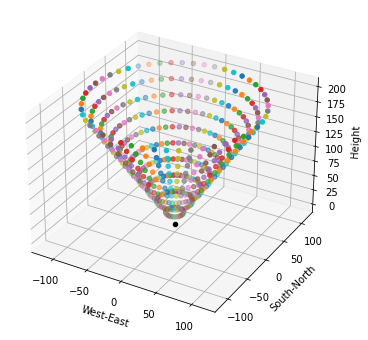

In [4]:
## Set up a default ZephIR300 virtual profiling lidar
ZephIR = virtualProfilingLidar('ZephIR300');

pts = ZephIR.get_scan_points()
print(ZephIR.scandescription)
print(ZephIR.scanpoints)

plot_3Dscan(ZephIR.get_scan_points())

Created Windcubev2 virtual lidar
range_gate_res : 20.0
minrange : 40.0
ngates : 10
RWF_func : <lambda>
tau : 265
taum : 165
scantype : DBSV4
azimuth0 : 90
elevation : 62.0
reconstruct_vert_func : reconstruct_vert_WCV2_wdir_weight
Computing scan points from lidar defaults

DBSV4 with vertical scan at 90.00 az 62.00 elev
<xarray.Dataset>
Dimensions:  (AlongBeam: 10, BeamIndex: 5)
Dimensions without coordinates: AlongBeam, BeamIndex
Data variables:
    z        (BeamIndex, AlongBeam) float64 40.0 60.0 80.0 ... 180.0 200.0 220.0
    y        (BeamIndex, AlongBeam) float64 21.27 31.9 ... 1.225e-14 1.347e-14
    x        (BeamIndex, AlongBeam) float64 1.302e-15 1.953e-15 ... -2.475e-30
    az       (BeamIndex) float64 90.0 0.0 -90.0 -180.0 -270.0
    elev     (BeamIndex) float64 62.0 62.0 62.0 62.0 90.0
    radius   (BeamIndex, AlongBeam) float64 45.3 67.95 90.61 ... 200.0 220.0


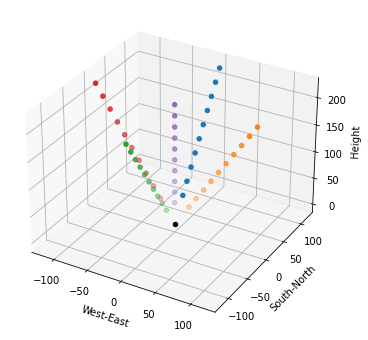

In [5]:
## Set up a default WindcubeV2 virtual profiling lidar with a custom starting azimuth angle
WCV2 = virtualProfilingLidar('Windcubev2',azimuth0=90);

## Optional: set up and view a potentially custom scan
## This can be skipped if default scan is being used
pts = WCV2.get_scan_points()
print()
print(WCV2.scandescription)
print(WCV2.scanpoints)

plot_3Dscan(WCV2.get_scan_points())

In [6]:
## Create a custom virtual profiling lidar from scratch
lidar = virtualProfilingLidar('Custom')

lidar.set_range_gates(15,10,5,'cw',alpha0=0.028,lambdaw=1565e-9)
lidar.set_common_scan('DBS8',az0=90,elev=80)
lidar.set_reconstruction('LstSq')

print(lidar)

Created Custom virtual lidar
Profiling Lidar
Lidar type name:       Custom
Range Gate Resolution: 5.0m
Minimum Range Gate:    15.0m
Number of Range Gates: 10
RWF/laser type:        <lambda>
Scan type:             DBS8
Reconstruction:        reconstruct_vert_lstsq_fit


In [7]:
## select wrf output files
sorted_files = sorted(glob.iglob(WRF_DIR + WRF_FILE_PATTERN))[:5]
print(*sorted_files,sep = "\n")

/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:00
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:01
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:02
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:03
/Users/raro0632/Documents/LES_DATA/Ideal/strongCBL/auxhist21_d01_0001-01-01_02:00:04


In [ ]:
## set lidar position (x,y middle here)
lidar_pos = [250,250]

## loop through files and perform virtual scan (this is slow)
ds = run_lidar_scan(WCV2,lidar_pos,sorted_files,save_dir='/Users/raro0632/Desktop/test_lidar/')

At 250.000000, 250.000000 WRF Terrain height: 0.00m

Processing Time:  0
Processing Time:  1
Processing Time:  2


In [ ]:
ds